16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


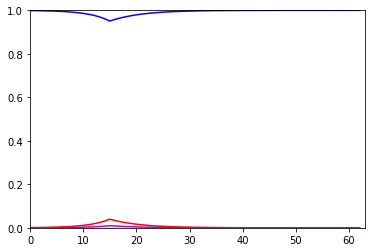

      dPlots    hPlots    wPlots  xPlots
0   0.001000  0.000000  0.999000       0
1   0.001120  0.000280  0.998600       1
2   0.001445  0.000361  0.998194       2
3   0.001864  0.000466  0.997671       3
4   0.002404  0.000600  0.996995       4
5   0.003101  0.000774  0.996124       5
6   0.004000  0.000999  0.995001       6
7   0.005160  0.001287  0.993552       7
8   0.006656  0.001660  0.991684       8
9   0.008585  0.002139  0.989275       9
10  0.011074  0.002756  0.986170      10
11  0.014282  0.003550  0.982167      11
12  0.018419  0.004571  0.977009      12
13  0.023753  0.005882  0.970365      13
14  0.030627  0.007564  0.961809      14
15  0.039485  0.009716  0.950799      15
16  0.033308  0.008217  0.958475      16
17  0.028031  0.006930  0.965039      17
18  0.023543  0.005831  0.970626      18
19  0.019740  0.004897  0.975364      19
20  0.016527  0.004105  0.979368      20
21  0.013820  0.003436  0.982743      21
22  0.011545  0.002873  0.985582      22
23  0.009636  0.

-2.806066263296683

In [3]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#graphing functions
def plot_2D(graphInfo, title="Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["hPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()

def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict

def run_generation_iF(simData):
    #load variables
    d=simData['d']
    qW=simData['qW']
    qD=simData['qD']
    qH=simData['qH']
    fW=simData['fW']
    a=simData['a']
    e=simData['e']
    if simData['curGen']<=simData['induceStart']:
        fD=simData['fD']
    else:
        print(simData['curGen'])
        fD=a*simData['fDP']+(1-a)*simData['fD']

    #manuscript equations
    #variables to prevent redundant multiplication
    w2=(qW*fW)**2
    wd=qW*fW*qD*fD
    wh=qW*fW*qH*(1-(1-fD)*d)
    d2=(qD*fD)**2
    dh=qD*fD*qH*(1-(1-fD)*d)
    h2=(qH*(1-(1-fD)*d))**2
    #print(1-(1-fD)*d)
    #expected total frquency after loss from fitness
    fBar=(qW*fW+qD*fD+qH*(1-(1-fD)*d))**2

    qWP=(w2+wh+.25*h2)/fBar
    qDP=(e*(2*wd+wh+dh+.5*h2)+d2+dh+.25*h2)/fBar
    qHP=((1-e)*(2*wd+wh+dh+.5*h2))/fBar
    
    #catch float multiplication rounding errors
    total=qWP+qDP+qHP
    if total!=1:
        qWP/=total
        qDP/=total
        qHP/=total
    return {'qW':qWP,'qD':qDP,'qH':qHP}
    

def run_simulation_iF(simData,graph=False,table=False):
    graphInfo={"xPlots": [0], "wPlots": [simData['qW']], "dPlots": [simData['qD']], "hPlots": [simData['qH']]}
    for i in range(1,simData['generations']+1):
        simData['curGen']=i
        update_vars(simData,run_generation_iF(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['hPlots'].append(simData['qH'])
        if simData['qW']>.99999:
            if graph:
                plot_2D(graphInfo)
            if table:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plot_2D(graphInfo)
            if table:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plot_2D(graphInfo)
    if table:
        print(pd.DataFrame(graphInfo))
    return 0

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.7,'e':.8,'d':.5,'fDP':.4,'a':.9,'generations':1000,'induceStart':15}
run_simulation_iF(simData,True,True)